# **SleepLab: Your 24/7 Sleep Companion**

---

### *Machine Learning Model - Neural Network*

## **Import Libraries**

In [129]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from numpy import ndarray
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
import json

## **Import Dataset**

In [130]:
df = pd.read_csv('https://raw.githubusercontent.com/abdulrohman19/SleepLab/machine-learning/Data/dataset.csv')
print(df)

     Sleep Duration  Physical Activity Level  BMI Category  Sleep Disorder
0               6.1                       42             2               0
1               6.2                       60             1               0
2               6.2                       60             1               0
3               5.9                       30             2               1
4               5.9                       30             2               1
..              ...                      ...           ...             ...
369             8.1                       75             2               1
370             8.0                       75             2               1
371             8.1                       75             2               1
372             8.1                       75             2               1
373             8.1                       75             2               1

[374 rows x 4 columns]


## **Data Preprocessing**

In [131]:
#Extract the target variable
dftarget = df['Sleep Disorder']

#Convert to NumPy array
target = dftarget.to_numpy()

#Remove the column from the DataFrame
df = df.drop(columns=['Sleep Disorder'])

#Convert the modified DataFrame to a NumPy array, representing the features
data = df.to_numpy()

**Split dataset into training and testing**

In [132]:
#Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(299, 3) (75, 3) (299,) (75,)


**Normalization**

In [133]:
#Creating a StandardScaler object
s = StandardScaler()

#Normalizing the features in the 'data' array
data = s.fit_transform(data)

print(data)

[[-1.29888693 -0.82541823  1.16922564]
 [-1.17303623  0.03984423 -0.85526691]
 [-1.17303623  0.03984423 -0.85526691]
 ...
 [ 1.21812712  0.76089629  1.16922564]
 [ 1.21812712  0.76089629  1.16922564]
 [ 1.21812712  0.76089629  1.16922564]]


## **Create and Train the Model**

In [134]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
    ])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with validation data and EarlyStopping callback
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
10/10 [==============================] - 1s 23ms/step - loss: 1.0822 - accuracy: 0.5184 - val_loss: 0.8345 - val_accuracy: 0.6267
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9295 - accuracy: 0.5753 - val_loss: 0.7927 - val_accuracy: 0.6267
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.8775 - accuracy: 0.6087 - val_loss: 0.7910 - val_accuracy: 0.8267
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.8288 - accuracy: 0.6187 - val_loss: 0.7307 - val_accuracy: 0.6933
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.8123 - accuracy: 0.6355 - val_loss: 0.6820 - val_accuracy: 0.7067
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7866 - accuracy: 0.6990 - val_loss: 0.6935 - val_accuracy: 0.7067
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7655 - accuracy: 0.6589 - val_loss: 0.6889 - val_accuracy: 0.8267
Epoch 8/100


**Review the architecture**

In [135]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 3)                 0         
                                                                 
 dense_67 (Dense)            (None, 512)               2048      
                                                                 
 dense_68 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 3587 (14.01 KB)
Trainable params: 3587 (14.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## **Model Evaluation**

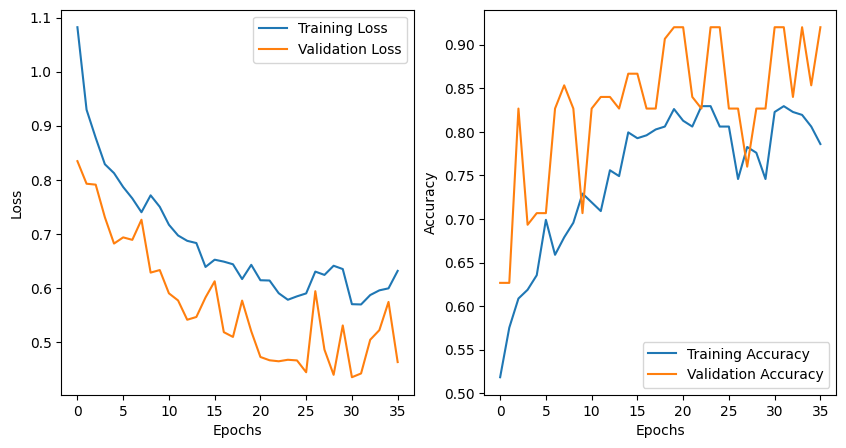

In [136]:
def plot_training_history(history):
    # Plot training loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

#Plot training loss and accuracy
plot_training_history(history)

**Evaluate the model on the test set**

In [137]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"\nValidation Loss: {val_loss}, Validation Accuracy: {val_acc}")

3/3 [==============================] - 0s 5ms/step - loss: 0.4348 - accuracy: 0.9200

Validation Loss: 0.43484172224998474, Validation Accuracy: 0.9200000166893005


## **Make Predictions**

In [138]:
#Make a prediction using the model
sleep_disorder = model.predict([[6.1, 90, 2]])

#Round the predicted probabilities
rounded_sleep_disorder = np.round(sleep_disorder)

#Find the predicted class by taking the index of the maximum probability
predicted_class = int(rounded_sleep_disorder.argmax(axis=-1))

#Print the prediction results
print("Predicted Sleep Disorder: ", sleep_disorder)
print("Predicted Sleep Disorder: ", rounded_sleep_disorder)
print("Predicted Sleep Disorder: ", predicted_class)

1/1 [==============================] - 0s 70ms/step
Predicted Sleep Disorder:  [[0.05208065 0.9376916  0.01022768]]
Predicted Sleep Disorder:  [[0. 1. 0.]]
Predicted Sleep Disorder:  1


## **Save the Model**

**Json format**

In [139]:
model_json = trained_model.to_json()
with open("sleeplab.json", "w") as json_file:
    json_file.write(model_json)

history_dict = history.history
with open("training_history.json", "w") as json_file:
    json.dump(history_dict, json_file)

**h5 format**

In [140]:
model.save("sleeplab.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
